In [54]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install tensorflow --upgrade

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/390.3 MB 10.6 MB/s eta 0:00:37
   ---------------------------------------- 0.9/390.3 MB 11.6 MB/s eta 0:00:34
   ---------------------------------------- 1.4/390.3 MB 11.3 MB/s eta 0:00:35
   ---------------------------------------- 2.0/390.3 MB 10.5 MB/s eta 0:00:37
   ---------------------------------------- 2.5/390.3 MB 11.6 MB/s eta 0:00:34
   ---------------------------------------- 3.1/390.3 MB 11.6 MB/s eta 0:00:34
   ---------------------------------------- 3.6/390.3 MB 11.1 MB/s eta 0:00:35
   ---------------------------------------- 4.2/390.3 MB 11.6 MB/s eta 0:00:34
   ---------------------------------------- 4.7/390.3 MB 11.7 MB/s eta 0:00:34
    --------------------------------------- 5.3/390.3 MB 11.7 MB/s eta 0:00:34
    --------------------------------------- 5.8/390.3 MB 11.7 MB/s eta 0:00:33
    --------------------------------------- 6.4/390.3 MB 11.


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [56]:
from keras.models import Sequential
from keras.layers import Dense

In [57]:
house_data = pd.read_csv('../datasets/kc_house_data.csv')

house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [58]:
#Shuffle the data points
house_data = house_data.sample(frac = 1).reset_index(drop = True)

In [59]:
#Drop all the categorical variables
normalize_data = house_data.drop(columns = ['id', 'price', 'lat', 'long', 'date', 'zipcode',
                                            'floors', 'waterfront', 'view', 'condition' ,'grade'])

In [60]:
ss = preprocessing.StandardScaler()

In [61]:
normalize_data = ss.fit_transform(normalize_data)

In [62]:
normalize_data[:10]

array([[ 0.67648506, -0.47362141, -0.41364504, -0.1561332 , -1.1332238 ,
         1.26194164, -0.54489777, -0.21012839, -0.53481999, -0.13802073],
       [-0.39873715, -0.79823546, -0.78384618, -0.21987122, -1.12114755,
         0.47109701, -2.04288581, -0.21012839, -0.62236325, -0.35777239],
       [-1.47395936, -1.44746357, -1.00161156, -0.21987122, -1.12114755,
         0.01918579, -0.98748515, -0.21012839, -0.95794574, -0.24789656],
       [-0.39873715, -1.44746357, -0.80562272, -0.26526041, -0.9037751 ,
         0.01918579, -1.70243398, -0.21012839, -1.045489  , -0.29789006],
       [ 0.67648506,  0.50022075,  1.38291931, -0.25606185,  1.02842445,
         0.94560379,  1.05522581, -0.21012839, -1.43943366, -0.30283448],
       [ 0.67648506,  0.1756067 , -0.37009197, -0.13295575, -0.75886013,
         0.65186149, -0.47680741, -0.21012839, -0.52022945, -0.11604557],
       [-0.39873715, -0.79823546, -0.09788525, -0.22040237,  0.24346839,
        -0.65868104, -1.53220807, -0.21012839

In [63]:
normalize_dataset = pd.DataFrame(normalize_data)

In [64]:
floors = house_data['floors']
waterfront = house_data['waterfront']
view = house_data['view']
condition = house_data['condition']
grade = house_data['grade']

In [65]:
x_data = pd.concat([normalize_dataset, floors, waterfront, view, condition, grade], axis = 1)

y_data = house_data['price']

In [66]:
from sklearn.preprocessing import OneHotEncoder

zipcode_ohe = OneHotEncoder()

In [67]:
X = zipcode_ohe.fit_transform(house_data.zipcode.values.reshape(-1, 1)).toarray()

In [68]:
df_onehot = pd.DataFrame(X, columns = ['zipcode_' + str(int(i)) for i in range (X.shape[1])])
x_data = pd.concat([x_data, df_onehot], axis = 1)

In [69]:
x_data.head()

,0,1,2,3,4,5,6,7,8,9,...,zipcode_60,zipcode_61,zipcode_62,zipcode_63,zipcode_64,zipcode_65,zipcode_66,zipcode_67,zipcode_68,zipcode_69
0,0.676485,-0.473621,-0.413645,-0.156133,-1.133224,1.261942,-0.544898,-0.210128,-0.534820,-0.138021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.398737,-0.798235,-0.783846,-0.219871,-1.121148,0.471097,-2.042886,-0.210128,-0.622363,-0.357772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.473959,-1.447464,-1.001612,-0.219871,-1.121148,0.019186,-0.987485,-0.210128,-0.957946,-0.247897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.398737,-1.447464,-0.805623,-0.265260,-0.903775,0.019186,-1.702434,-0.210128,-1.045489,-0.297890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.676485,0.500221,1.382919,-0.256062,1.028424,0.945604,1.055226,-0.210128,-1.439434,-0.302834,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [71]:
#80:20 Train:Test split
train_data = x_data[:-4322]
test_data = x_data[-4322:]

train_labels = y_data[:-4322]
test_labels = y_data[-4322:]

In [72]:
print("Training set: {}".format(train_data.shape))
print("Testing set: {}".format(test_data.shape))

Training set: (17291, 85)
Testing set: (4322, 85)


In [73]:
def build_model():

    model = keras.Sequential([
                keras.layers.Dense(64,
                                   activation = tf.nn.relu,
                                   input_shape = (train_data.shape[1],)),

                keras.layers.Dense(64,
                                   activation = tf.nn.relu),

                keras.layers.Dense(1)
            ])
    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss = 'mse',
                  optimizer = optimizer,
                  metrics = ['mae'])
    return model

In [74]:
model = build_model()
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           5,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,729 (38.00 KB)

 Trainable params: 9,729 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
weights = model.layers[0].get_weights()

len(weights)

2

In [76]:
history = model.fit(train_data,
                    train_labels,
                    validation_split = 0.2,
                    epochs = 100,
                    verbose = 1)

Epoch 1/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 298128769024.0000 - mae: 404196.6875 - val_loss: 45410566144.0000 - val_mae: 136127.9375
Epoch 2/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56295653376.0000 - mae: 138387.4375 - val_loss: 35944763392.0000 - val_mae: 119372.9062
Epoch 3/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 41829879808.0000 - mae: 121534.5156 - val_loss: 31311411200.0000 - val_mae: 109705.6016
Epoch 4/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34117920768.0000 - mae: 111398.7266 - val_loss: 29043767296.0000 - val_mae: 109829.0859
Epoch 5/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32299714560.0000 - mae: 106432.8984 - val_loss: 25415522304.0000 - val_mae: 98898.7812
Epoch 6/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 28706572288.0000 - mae: 98091.9922 - val_loss: 23092746240.0000 - val_mae: 94748.5234
Epoch 7/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32952659968.0000 - mae: 98793.4141 - val_loss: 

In [77]:
def plot_history(history):

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')

    plt.plot(history.epoch, np.array(history.history['mae']),
             label='Train Loss')  # Changed to 'mae'
    plt.plot(history.epoch, np.array(history.history['val_mae']),
             label='Val Loss')  # Changed to 'val_mae'

    plt.legend()
    plt.show()

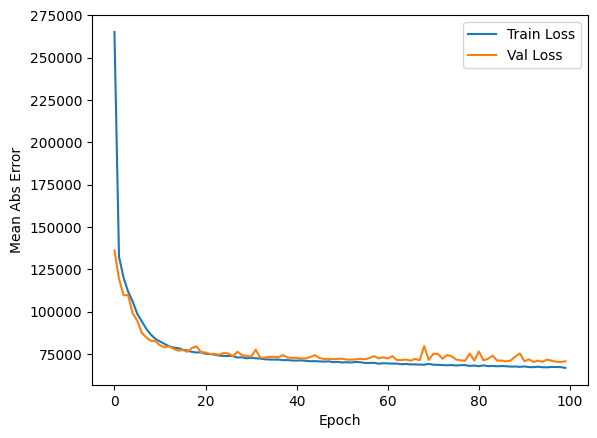

In [78]:
plot_history(history)

In [79]:
weights = model.layers[0].get_weights()
weights_final = weights[0]
bias_finals = weights[1]

weights_final
bias_finals

array([ -3.2125993 ,  -8.29299   ,   2.592226  ,  -2.2783244 ,
         1.1700436 ,   3.7526448 , -10.993628  ,  -5.0919104 ,
        -0.05250865,   1.9810221 ,  -0.2051326 , -10.595729  ,
         1.1367711 , -10.032916  ,  -3.9375374 ,  -8.960592  ,
        -2.0584686 , -10.818464  ,  -6.3167496 ,  -0.05268791,
         2.3831394 , -11.943841  ,  -8.32504   , -12.277662  ,
         2.3115351 ,  -8.651455  ,   2.7067277 ,  -8.535613  ,
         3.5993814 ,   0.29863322,  -8.60147   ,  -9.07972   ,
       -10.512417  ,   0.33335277,  -3.9756048 , -10.532826  ,
        -9.2543125 , -11.185831  ,   1.7909737 ,  -9.642883  ,
        -0.6475759 ,   2.567682  ,   1.6982142 ,   2.3814535 ,
        -9.288987  ,  -9.966887  , -10.4065075 ,   3.2174609 ,
       -12.1785965 ,  -3.8505886 ,  -0.07905224,   0.8793811 ,
        -9.779858  ,   2.076613  , -13.043273  ,  -0.8592281 ,
         0.2578965 ,  -3.2387109 ,  -7.5799775 , -10.589885  ,
         2.2283957 ,  -8.915335  ,  -0.10291001,  -0.72

In [80]:
[loss, mae] = model.evaluate(test_data,
                             test_labels,
                             verbose = 1)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 15397796864.0000 - mae: 72729.3359


In [81]:
print('Testing set Mean Abs Error: ${:7.2f}'.format(mae))

print('Testing set loss:{:7.2f}'.format(loss))

Testing set Mean Abs Error: $72065.55
Testing set loss:15479251968.00


In [82]:
train_predictions = model.predict(train_data)
test_predictions = model.predict(test_data).flatten()

541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step


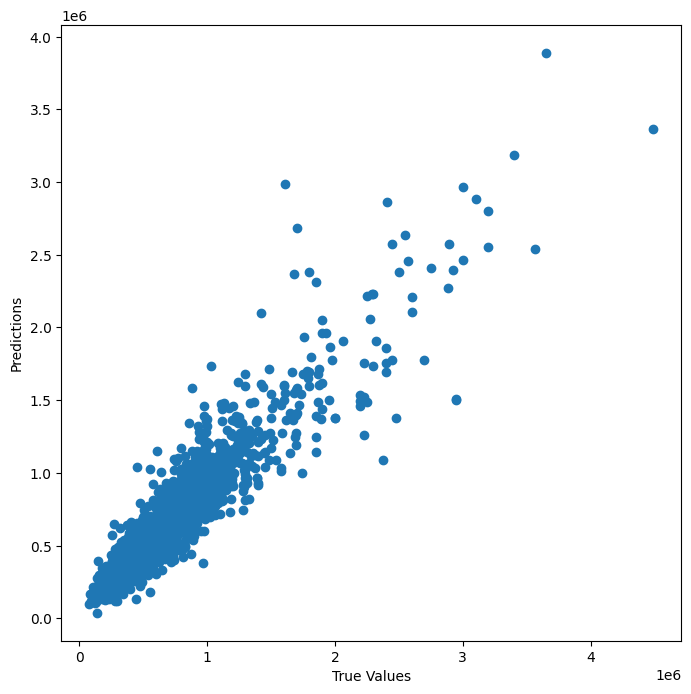

In [83]:
plt.figure(figsize=(8, 8))

plt.scatter(test_labels, test_predictions)

plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

In [84]:
print('R^2 score for training data: %.2f' % r2_score(train_labels, train_predictions))
print('R^2 score for test data: %.2f' % r2_score(test_labels, test_predictions))

R^2 score for training data: 0.91
R^2 score for test data: 0.88


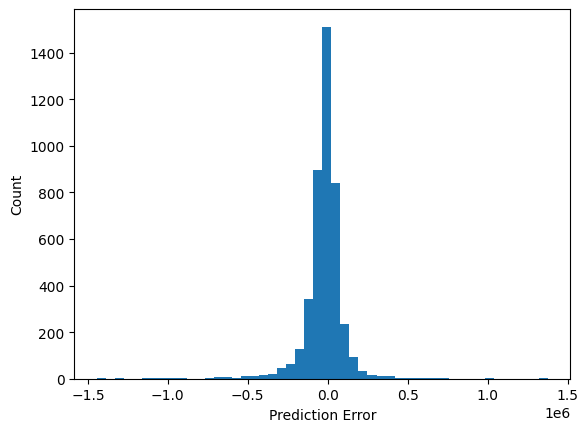

In [85]:
error = test_predictions - test_labels

plt.hist(error, bins = 50)

plt.xlabel('Prediction Error')

plt.ylabel('Count')

plt.show()

In [86]:
import seaborn as sns

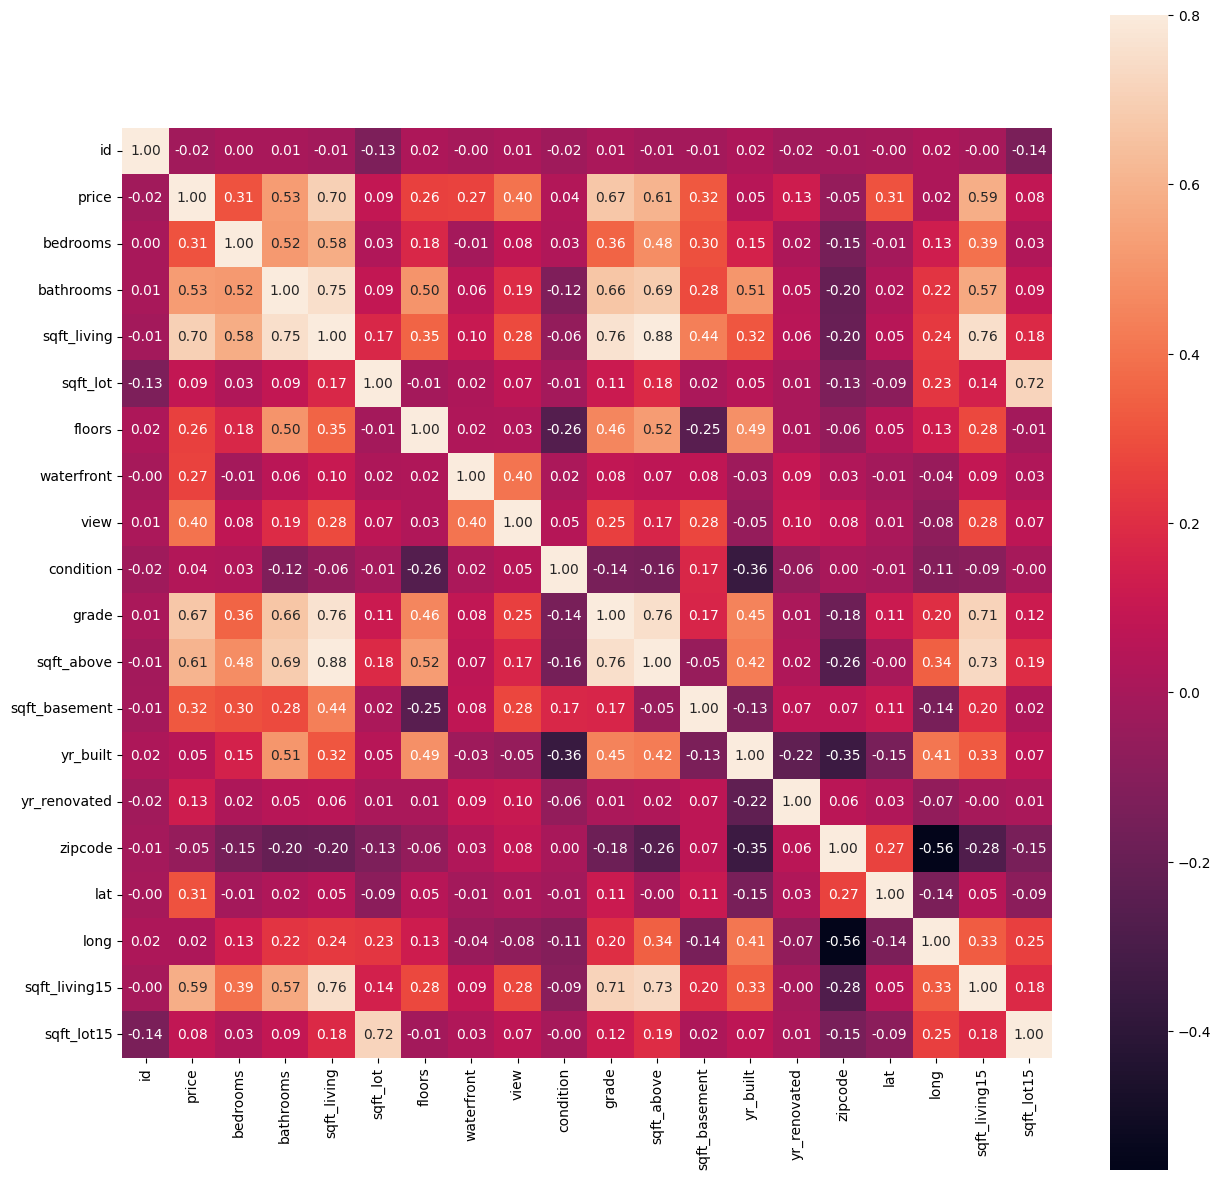

In [95]:
numeric_data = house_data.select_dtypes(include=['number'])

# Compute correlation matrix
corrmat = numeric_data.corr()

#corrmat = house_data.corr()

f,ax = plt.subplots(figsize = (15, 15))

sns.heatmap(corrmat,
            vmax = .8,
            square = True,
            annot = True,
            fmt = '.2f')
plt.show()